In [1]:
# Import necessary libraries
import os
from matplotlib import pyplot as plt
import cv2 as cv
import yaml

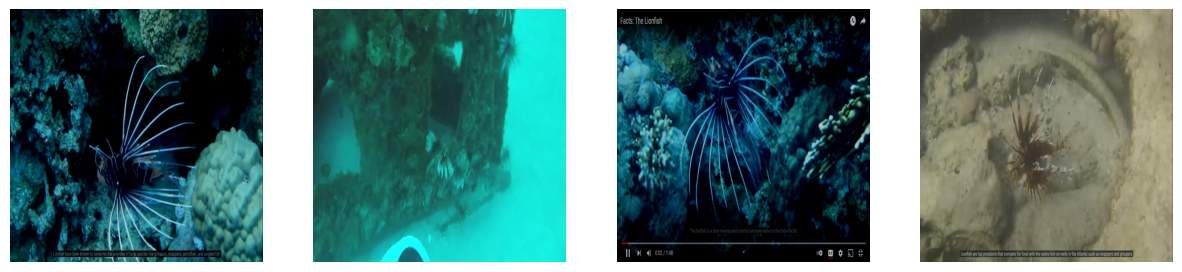

In [2]:
# Visualize some images from the dataset
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Paths to some example images
example_images = [
    "/kaggle/input/lionfish-turtle-yolov5/aggregated_data/train/images/lionfish_1.jpg",
    "/kaggle/input/lionfish-turtle-yolov5/aggregated_data/train/images/lionfish_21.jpg",
    "/kaggle/input/lionfish-turtle-yolov5/aggregated_data/train/images/lionfish_41.jpg",
    "/kaggle/input/lionfish-turtle-yolov5/aggregated_data/train/images/lionfish_61.jpg",
]

for i, img_path in enumerate(example_images):
    image = cv.imread(img_path)
    ax[i].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    ax[i].axis('off')

plt.show()

In [3]:
# Set up YOLOv5
!mkdir -p /kaggle/working/tmp
%cd /kaggle/working/tmp
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

/kaggle/working/tmp
Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 30.70 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
/kaggle/working/tmp/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 17.1 MB/s eta 0:00:00a 0:00:01


In [4]:
# Verify setup
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

# Create the `data.yaml` file for YOLOv5
data_yaml = {
    'path': '/kaggle/input/lionfish-turtle-yolov5/aggregated_data',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 2,
    'names': ['Lionfish', 'Turtle']
}

# Save the YAML file in the current working directory
with open('/kaggle/working/tmp/yolov5/data.yaml', 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

Setup complete. Using torch 2.5.1+cu121 (Tesla T4)


In [5]:
# Train YOLOv5
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data /kaggle/working/tmp/yolov5/data.yaml --weights yolov5n.pt

W&B disabled.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-02-08 23:07:02.925535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-08 23:07:03.111810: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-08 23:07:03.168847: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] 

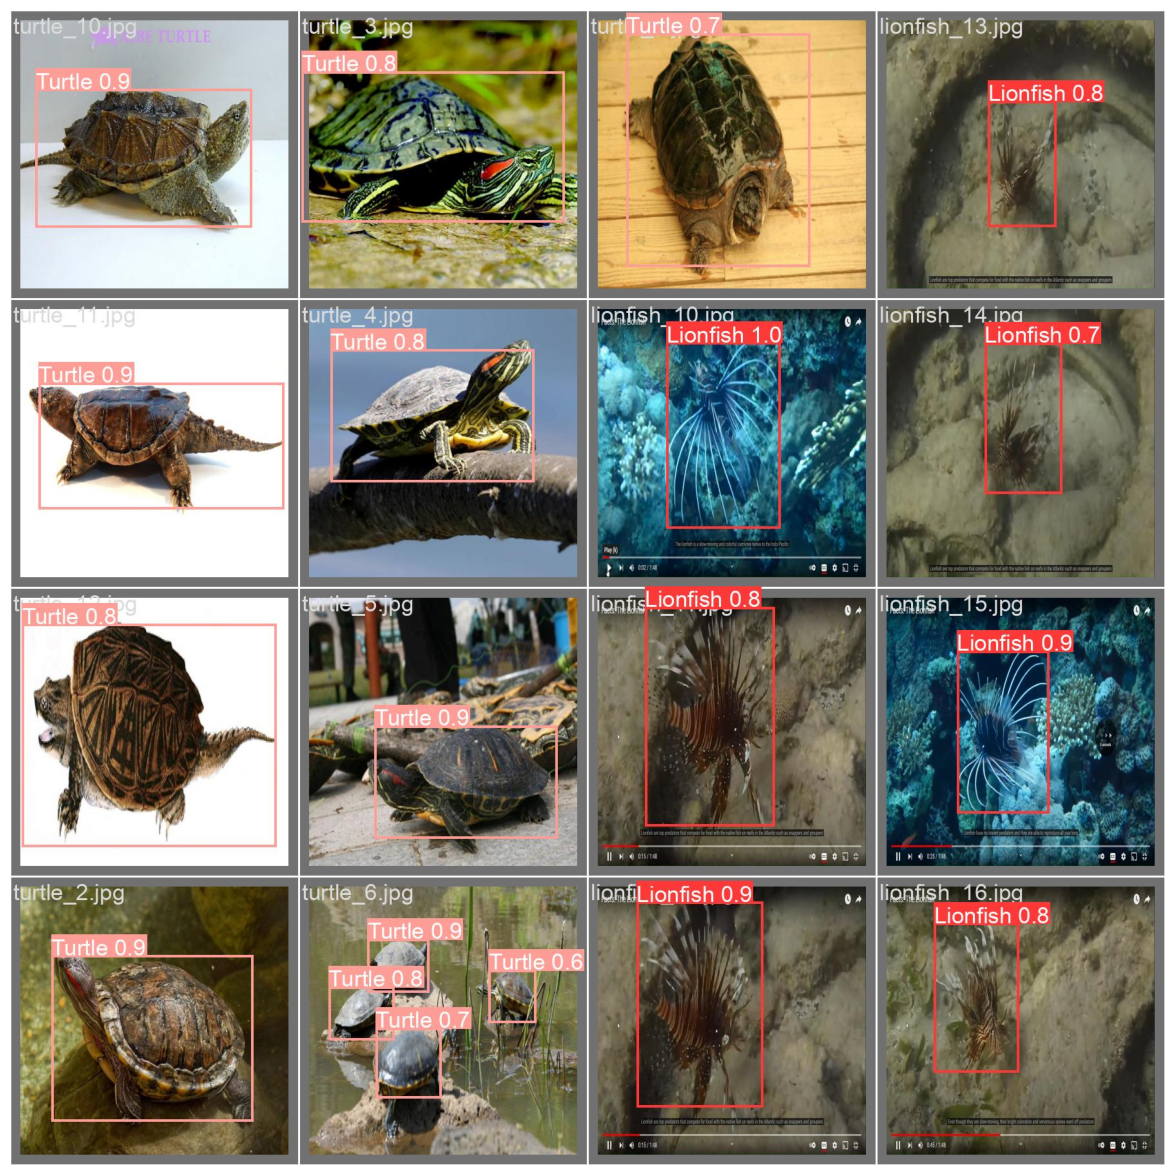

In [6]:
# Visualize validation predictions
val_pred_img = "runs/train/exp/val_batch0_pred.jpg"  # Adjust if the folder name differs
if os.path.exists(val_pred_img):
    img = cv.imread(val_pred_img)
    plt.figure(figsize=(15, 15))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [ ]:
# Test the model on a sample image
test_image = "//kaggle/input/lionfish-turtle-yolov5/aggregated_data/test/images/lionfish_14.jpg"
!python detect.py --source $test_image --weights runs/train/exp/weights/best.pt --conf 0.25

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Path to the detection result image (you need to point to a specific image in the exp3 folder)
detect_result = "runs/detect/exp3/lionfish-turtle-yolov5/aggregated_data/test/images/lionfish_14.jpg"  # Replace with the correct file name

# Check if the result image exists
if os.path.exists(detect_result):
    # Read the image with detections (bounding boxes)
    img = cv.imread(detect_result)
    
    # Visualize the result
    plt.figure(figsize=(15, 15))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct visualization
    plt.axis('off')
    plt.show()
else:
    print("Detection result not found!")
